In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.signal import convolve2d
from scipy.optimize import curve_fit

In [23]:
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'lines.linewidth': 2})

def findMoment(arr,order,shift=0):
    # Shift i to i - 50
    shifted_indices = np.arange(len(arr)) - (len(arr)/2) - shift
    
    zero = arr[0]

    return np.sum(shifted_indices**order * (arr-np.min(arr))) / np.sum(arr-np.min(arr))
    # return np.sum(shifted_indices**order * (np.abs(arr-zero)) / np.sum(np.abs(arr-zero)))

## 100*100 Correlation Diagonal Hopping Della

### Scan pgen

pdr=0.35, pgen=0.01, nsim=2000, d1101-1150 => 1100

pdr=0.35, pgen=0.05, nsim=2000, d2101-2150 => 2100
 
pdr=0.35, pgen=0.1, nsim=2000, d3101-3150 => 3100
  
pdr=0.35, pgen=0.5, nsim=2000, d4101-4150 => 4100

In [42]:
file_name = "../data/240922/240922_d1100"
raw = np.load(file_name+"_scoor_pp.npz")
x_l = raw["x_l"]
y_l = raw["y_l"]
t_l = raw["z_l"]
scoor = raw["data_ave_l"]
raw = np.load(file_name+"_pcoor_pp.npz")
pcoor = raw["data_ave_l"]
raw = np.load(file_name+"_ncoor_pp.npz")
ncoor = raw["data_ave_l"]

mid_lattice = int(len(x_l)/2)
print(len(x_l),len(y_l),len(t_l))

100 100 2000


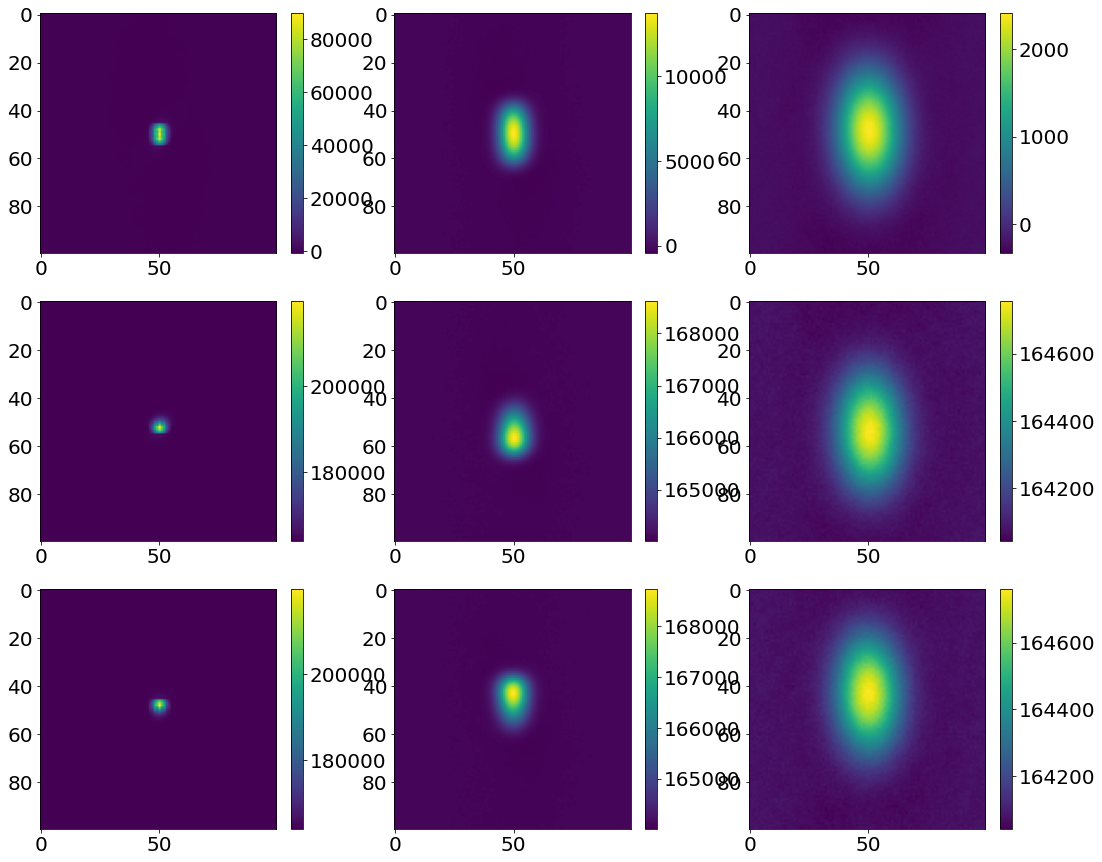

In [43]:
t1 = 4
t2 = 20
t3 = 100

plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(scoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(pcoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.imshow(ncoor_r,aspect='auto')
plt.colorbar()

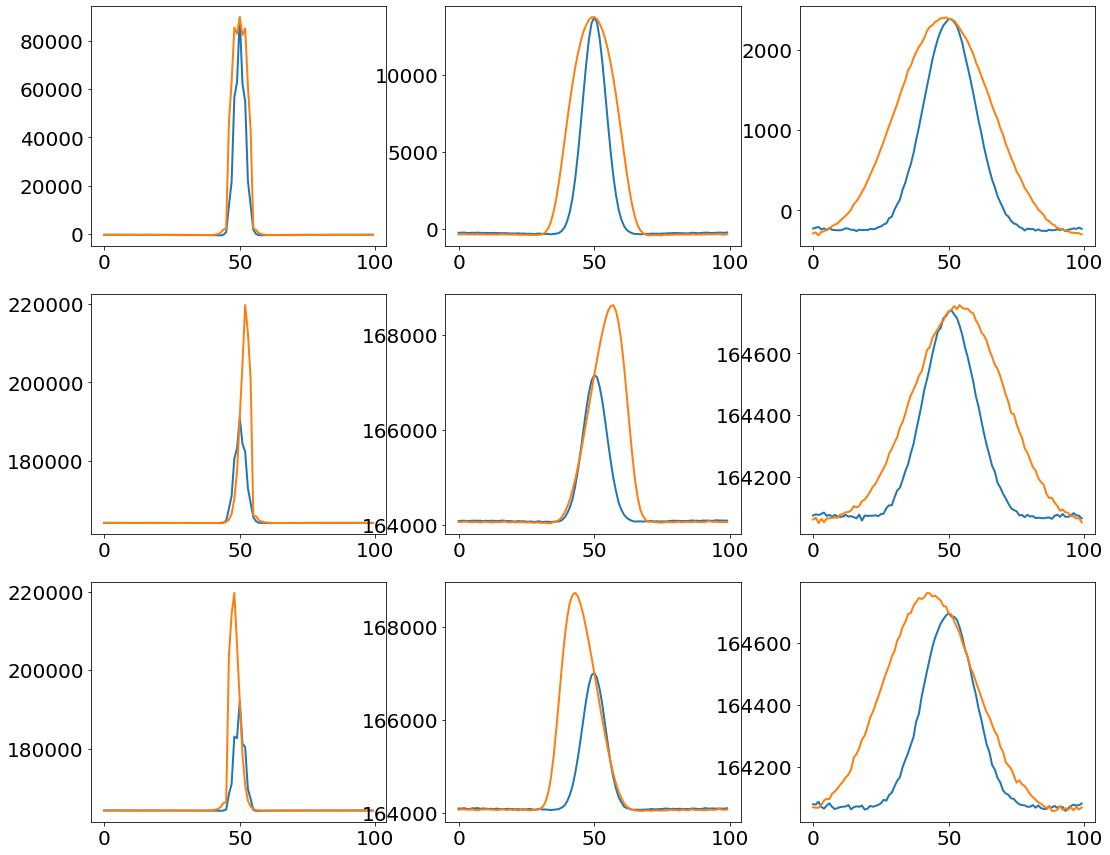

In [44]:
plt.figure(figsize=(18,15))
plt.subplot(3,3,1)
scoor_r = np.roll(scoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(scoor_r[mid_lattice,:])
plt.plot(scoor_r[:,mid_lattice])
plt.subplot(3,3,2)
scoor_r = np.roll(scoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(scoor_r[mid_lattice,:])
plt.plot(scoor_r[:,mid_lattice])
plt.subplot(3,3,3)
scoor_r = np.roll(scoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(scoor_r[mid_lattice,:])
plt.plot(scoor_r[:,mid_lattice])
plt.subplot(3,3,4)
pcoor_r = np.roll(pcoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(pcoor_r[mid_lattice,:])
plt.plot(pcoor_r[:,mid_lattice])
plt.subplot(3,3,5)
pcoor_r = np.roll(pcoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(pcoor_r[mid_lattice,:])
plt.plot(pcoor_r[:,mid_lattice])
plt.subplot(3,3,6)
pcoor_r = np.roll(pcoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(pcoor_r[mid_lattice,:])
plt.plot(pcoor_r[:,mid_lattice])
plt.subplot(3,3,7)
ncoor_r = np.roll(ncoor[:,:,t1],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(ncoor_r[mid_lattice,:])
plt.plot(ncoor_r[:,mid_lattice])
plt.subplot(3,3,8)
ncoor_r = np.roll(ncoor[:,:,t2],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(ncoor_r[mid_lattice,:])
plt.plot(ncoor_r[:,mid_lattice])
plt.subplot(3,3,9)
ncoor_r = np.roll(ncoor[:,:,t3],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
plt.plot(ncoor_r[mid_lattice,:])
plt.plot(ncoor_r[:,mid_lattice])

find moment along the parallel cut

In [45]:
tm_l = np.arange(10,200)
m1_l = np.zeros(tm_l.shape)
m2_l = np.zeros(tm_l.shape)
m3_l = np.zeros(tm_l.shape)
m4_l = np.zeros(tm_l.shape)
m5_l = np.zeros(tm_l.shape)
m6_l = np.zeros(tm_l.shape)
m7_l = np.zeros(tm_l.shape)
m8_l = np.zeros(tm_l.shape)

for idx, tm in enumerate(tm_l):
    scoor_r = np.roll(scoor[:,:,tm],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
    m1_l[idx] = findMoment(scoor_r[:,mid_lattice],1)
    m2_l[idx] = findMoment(scoor_r[:,mid_lattice],2,shift=m1_l[idx])
    m3_l[idx] = findMoment(scoor_r[:,mid_lattice],3,shift=m1_l[idx])
    m4_l[idx] = findMoment(scoor_r[:,mid_lattice],4,shift=m1_l[idx])
    m5_l[idx] = findMoment(scoor_r[:,mid_lattice],5,shift=m1_l[idx])
    m6_l[idx] = findMoment(scoor_r[:,mid_lattice],6,shift=m1_l[idx])
    m7_l[idx] = findMoment(scoor_r[:,mid_lattice],7,shift=m1_l[idx])
    m8_l[idx] = findMoment(scoor_r[:,mid_lattice],8,shift=m1_l[idx])

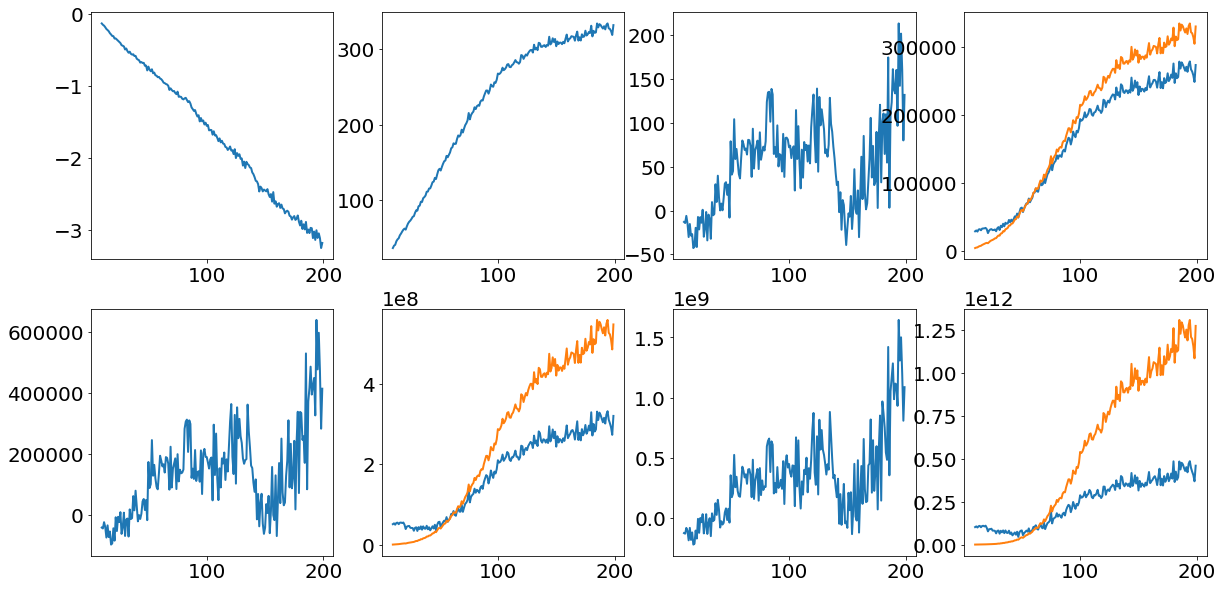

In [47]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.plot(tm_l,m1_l)
plt.subplot(2,4,2)
plt.plot(tm_l,m2_l)
plt.subplot(2,4,3)
plt.plot(tm_l,m3_l)
plt.subplot(2,4,4)
plt.plot(tm_l,m4_l)
plt.plot(tm_l,3*m2_l**2)
plt.subplot(2,4,5)
plt.plot(tm_l,m5_l)
plt.subplot(2,4,6)
plt.plot(tm_l,m6_l)
plt.plot(tm_l,15*m2_l**3)
plt.subplot(2,4,7)
plt.plot(tm_l,m7_l)
plt.subplot(2,4,8)
plt.plot(tm_l,m8_l)
plt.plot(tm_l,105*m2_l**4)

moment along the prependicular cut

In [48]:
tm_l = np.arange(10,400)
m1_l = np.zeros(tm_l.shape)
m2_l = np.zeros(tm_l.shape)
m3_l = np.zeros(tm_l.shape)
m4_l = np.zeros(tm_l.shape)
m5_l = np.zeros(tm_l.shape)
m6_l = np.zeros(tm_l.shape)
m7_l = np.zeros(tm_l.shape)
m8_l = np.zeros(tm_l.shape)

for idx, tm in enumerate(tm_l):
    scoor_r = np.roll(scoor[:,:,tm],(int(len(x_l)/2),int(len(y_l)/2)),(0,1)).T
    m1_l[idx] = findMoment(scoor_r[mid_lattice,:],1)
    m2_l[idx] = findMoment(scoor_r[mid_lattice,:],2,shift=m1_l[idx])
    m3_l[idx] = findMoment(scoor_r[mid_lattice,:],3,shift=m1_l[idx])
    m4_l[idx] = findMoment(scoor_r[mid_lattice,:],4,shift=m1_l[idx])
    m5_l[idx] = findMoment(scoor_r[mid_lattice,:],5,shift=m1_l[idx])
    m6_l[idx] = findMoment(scoor_r[mid_lattice,:],6,shift=m1_l[idx])
    m7_l[idx] = findMoment(scoor_r[mid_lattice,:],7,shift=m1_l[idx])
    m8_l[idx] = findMoment(scoor_r[mid_lattice,:],8,shift=m1_l[idx])

100 100
117.31566666666667 -174.65183333333334


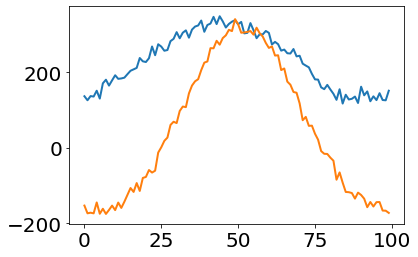

In [49]:
plt.plot(scoor_r[:,mid_lattice])
plt.plot(scoor_r[mid_lattice,:])
print(len(scoor_r[:,mid_lattice]),len(scoor_r[mid_lattice,:]))
print(np.min(scoor_r[:,mid_lattice]),np.min(scoor_r[mid_lattice,:]))

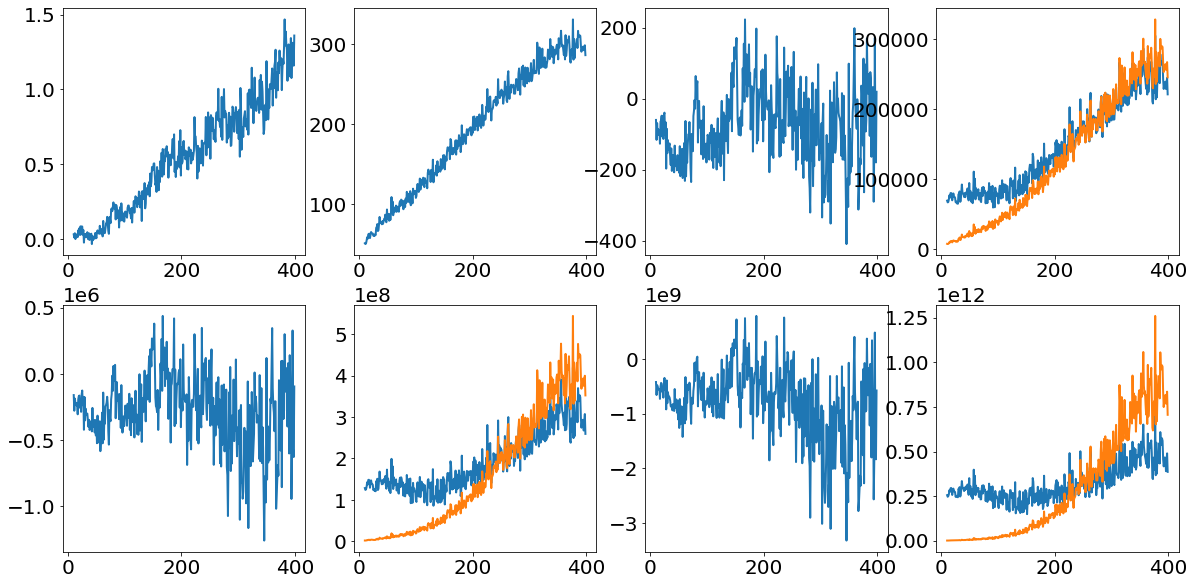

In [50]:
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.plot(tm_l,m1_l)
plt.subplot(2,4,2)
plt.plot(tm_l,m2_l)
plt.subplot(2,4,3)
plt.plot(tm_l,m3_l)
plt.subplot(2,4,4)
plt.plot(tm_l,m4_l)
plt.plot(tm_l,3*m2_l**2)
plt.subplot(2,4,5)
plt.plot(tm_l,m5_l)
plt.subplot(2,4,6)
plt.plot(tm_l,m6_l)
plt.plot(tm_l,15*m2_l**3)
plt.subplot(2,4,7)
plt.plot(tm_l,m7_l)
plt.subplot(2,4,8)
plt.plot(tm_l,m8_l)
plt.plot(tm_l,105*m2_l**4)

## 200*200 Correlation Diagonal Hopping Della

### Scan pgen

pdr=0.35, pgen=0.01, nsim=2000, d5101-5150 => 5100
 
pdr=0.35, pgen=0.1, nsim=2000, d6101-3150 => 6100

800 time step

pdr=0.35, pgen=0.01, nsim=2000, d7101-7150 => 7100
 
pdr=0.35, pgen=0.1, nsim=2000, d8101-8150 => 8100